# Seleccion de las librerias y creacion de los dataframes

### **Idea General del analisis:**
Predecir quien puede estar interesado en comprar una poliza de seguro para una caravana 

### **Variable objetivo:** 
CARAVAN:Number of mobile home policies

## Instalacion de las librerias a utilizar

Aqui se importa las librerias que seria necesarias para el analisis a realizar

In [1]:
#IMPORTAR LIBRERIA

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from matplotlib.pyplot import *
from sklearn.impute import KNNImputer
import scipy.stats as ss
import warnings

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)



## Creacion de funciones

**Se cargan algunas funciones a utilizar que nos ayudan en el futuro analisis de los datos**

In [4]:
# Esta funcion se encarga de identificar las variables categoricas y colocarlas dentro de una lista especifica. Las 
#variables que se muestran como numericas se recopilan en otra lista.
def dame_variables_categoricas(dataset=None):
    if dataset is None:
        print(u'\nFaltan argumentos por pasar a la función')
        return 1
    lista_variables_categoricas = []
    other = []
    for i in dataset.columns:
        if (dataset[i].dtype!=float) & (dataset[i].dtype!=int):
            unicos = int(len(np.unique(dataset[i].dropna(axis=0, how='all'))))
            if unicos < 100:
                lista_variables_categoricas.append(i)
            else:
                other.append(i)

    return lista_variables_categoricas, other

# Esta funcion ayuda al momento de visualizacion de las diferentes variables dentro del dataset para poder comparar en base 
#la funcion objetivo como es el comportamiento de la demas variables

def plot_feature(df, col_name, isContinuous, target):
    """
    Visualize a variable with and without faceting on the loan status.
    - df dataframe
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    count_null = df[col_name].isnull().sum()
    if isContinuous:
        
        sns.histplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name+ ' Numero de nulos: '+str(count_null))
    plt.xticks(rotation = 90)


    if isContinuous:
        sns.boxplot(x=col_name, y=target, data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by '+target)
    else:
        data = df.groupby(col_name)[target].value_counts(normalize=True).to_frame('proportion').reset_index() 
        data.columns = [i, target, 'proportion']
        #sns.barplot(x = col_name, y = 'proportion', hue= target, data = data, saturation=1, ax=ax2)
        sns.barplot(x = col_name, y = 'proportion', hue= target, data = data, saturation=1, ax=ax2)
        ax2.set_ylabel(target+' fraction')
        ax2.set_title(target)
        plt.xticks(rotation = 90)
    ax2.set_xlabel(col_name)
    
    plt.tight_layout()
    

## Creacion de dataframes y verificacion de los datos a analizar dentro de los dataframes

**Se crean dos dataframes donde uno tiene el conjunto de datos que se van a utilizar para training y el otro contiene el nombre de las columnas que seran posteriormente unificados en un solo dataset**

In [81]:
#Importe de los datasets al notebook
pd_data = pd.read_csv("C:/Users/karla/Documents/CUNEF/5_machine_learning/2_practicas/practica_EDA/data/raw/ticdata2000.txt"\
                           ,sep ='\t', header = None)
pd_data.shape

(5822, 86)

In [82]:
# Se extrae el dataset donde se encuentran los nombres de las columnas
pd_headfiles = pd.read_csv("C:/Users/karla/Documents/CUNEF/5_machine_learning/2_practicas/practica_EDA/data/raw/dictionary.txt"\
                           ,sep = '\t', header = None, skiprows=3, nrows=86)

#Se crean 3 columnas separadas por los espacios en blanco o " ", 
pd_headfiles[["ind","col_name","description"]] = pd_headfiles[0].str.split(pat= " ",n=2, expand = True)   
pd_headfiles = (pd_headfiles[["col_name","description"]])

#Creo una lista con el nombre de las variables que van a ubicarse como nombre de las columnas
title=[]
for i in pd_headfiles["col_name"]:
    title.append(i)
    
#Asigno la lista creada a partir del diccionario como nombre del dataset pd_data
pd_data.columns = title

pd_data

MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
0          33         1        3         2         8       0       5       1   
1          37         1        2         2         8       1       4       1   
2          37         1        2         2         8       0       4       2   
3           9         1        3         3         3       2       3       2   
4          40         1        4         2        10       1       4       1   
...       ...       ...      ...       ...       ...     ...     ...     ...   
5817       36         1        1         2         8       0       6       1   
5818       35         1        4         4         8       1       4       1   
5819       33         1        3         4         8       0       6       0   
5820       34         1        3         2         8       0       7       0   
5821       33         1        3         3         8       0       6       1   

      MGODGE  MRELGE  MRELSA  MRELOV  MFALLEEN  MFGEKIND  MFWEKIND  MOPLHOOG  \
0          3       7       0       2         1         2         6         1   
1          4       6       2       2         0         4         5         0   
2          4       3       2       4         4         4         2         0   
3          4       5       2       2         2         3         4         3   
4          4       7       1       2         2         4         4         5   
...      ...     ...     ...     ...       ...       ...       ...       ...   
5817       2       1       2       6         5         3         2         2   
5818       4       6       0       3         2         2         5         0   
5819       3       5       1       4         3         3         4         0   
5820       2       7       2       0         0         4         5         0   
5821       2       7       1       2         1         4         4         1   

      MOPLMIDD  MOPLLAAG  MBERHOOG  MBERZELF  MBERBOER  MBERMIDD  MBERARBG  \
0            2         7         1         0         1         2         5   
1            5         4         0         0         0         5         0   
2            5         4         0         0         0         7         0   
3            4         2         4         0         0         3         1   
4            4         0         0         5         4         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
5817         5         2         2         0         0         4         1   
5818         0         9         2         1         1         3         3   
5819         1         8         1         0         0         2         3   
5820         2         7         0         2         0         2         4   
5821         2         6         1         0         1         3         2   

      MBERARBO  MSKA  MSKB1  MSKB2  MSKC  MSKD  MHHUUR  MHKOOP  MAUT1  MAUT2  \
0            2     1      1      2     6     1       1       8      8      0   
1            4     0      2      3     5     0       2       7      7      1   
2            2     0      5      0     4     0       7       2      7      0   
3            2     3      2      1     4     0       5       4      9      0   
4            0     9      0      0     0     0       4       5      6      2   
...        ...   ...    ...    ...   ...   ...     ...     ...    ...    ...   
5817         3     2      3      3     3     0       9       0      5      1   
5818         2     0      4      5     0     0       3       6      6      1   
5819         5     1      1      1     4     4       7       2      4      0   
5820         2     0      0      4     5     0       2       7      5      4   
5821         4     1      1      2     6     1       5       4      5      2   

      MAUT0  MZFONDS  MZPART  MINKM30  MINK3045  MINK4575  MINK7512  MINK123M  \
0         1        8       1        0         4         5         0         0   
1         2        6    

**Luego de la creacion del dataframe verifico que la cantidad de filas y columnas que se tenia originalmente en el dataframe de los datos sigue siendo la misma luego de insertar el titulo de las columnas y por tanto no hubo modificacion interna de datos.** 

In [34]:
# Verifico que las modificaciones realizadas en el dataframe siguen teniendo como resultado el mismo num de filas y columnas
pd_data.shape

(5822, 86)

In [60]:
#Verifico el tipo de datos que se encuentra contenido en cada columna del dataframe creado y compruebo el tipo de dato original
#que estan en mi dataset para evaluar si existe algun tipo de dato que se encuentre descrito de forma incorrecta y por tanto 
#tenga que ser modificado

pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   MOSTYPE   5822 non-null   int64
 1   MAANTHUI  5822 non-null   int64
 2   MGEMOMV   5822 non-null   int64
 3   MGEMLEEF  5822 non-null   int64
 4   MOSHOOFD  5822 non-null   int64
 5   MGODRK    5822 non-null   int64
 6   MGODPR    5822 non-null   int64
 7   MGODOV    5822 non-null   int64
 8   MGODGE    5822 non-null   int64
 9   MRELGE    5822 non-null   int64
 10  MRELSA    5822 non-null   int64
 11  MRELOV    5822 non-null   int64
 12  MFALLEEN  5822 non-null   int64
 13  MFGEKIND  5822 non-null   int64
 14  MFWEKIND  5822 non-null   int64
 15  MOPLHOOG  5822 non-null   int64
 16  MOPLMIDD  5822 non-null   int64
 17  MOPLLAAG  5822 non-null   int64
 18  MBERHOOG  5822 non-null   int64
 19  MBERZELF  5822 non-null   int64
 20  MBERBOER  5822 non-null   int64
 21  MBERMIDD  5822 non-null   int64
 22  

- Los datos obtenidos la verificar las caracteristicas que se encuentran en el set de datos es que todas las variables estan clasificadas como variables entero. Por tanto se tiene que pasar a convertir algunas de las variables que se encuentran definidas como entero en categoricas

## Identificacion y transformacion de las variables categoricas

In [122]:
#Esta lista se obtine de analizar los datos con su descripcion al realizar el diccionario de los datos para este conjunto de  
#datos. Las variables categoricas estan tomadas sobre inferencia a cuales de las variables en el dataset original estaban 
#descritas como categorias

var_cat = pd_data[["MOSTYPE","MOSHOOFD","MGODRK","MGODPR","MGODOV","MGODGE",\
                   "MRELGE","MRELSA","MRELOV","MFALLEEN","MFGEKIND","MFWEKIND",\
                   "MOPLHOOG","MOPLMIDD","MOPLLAAG","MBERHOOG","MBERZELF","MBERBOER",\
                   "MBERMIDD","MBERARBG","MBERARBO","MSKA", "MSKB1", "MSKB2",\
                   "MSKC", "MSKD", "MHHUUR", "MHKOOP", "MAUT1", "MAUT2", "MAUT0",\
                   "MZFONDS", "MZPART", "MKOOPKLA"]]
var_cat = var_cat.astype(str)
var_cat.dtypes

pd_data=pd_data[:,].drop(var_cat)
#pd_data["var_cat"].astype(str)

InvalidIndexError: (slice(None, None, None),)

MAANTHUI  MGEMOMV  MGEMLEEF  MINKM30  MINK3045  MINK4575  MINK7512  \
0            1        3         2        0         4         5         0   
1            1        2         2        2         0         5         2   
2            1        2         2        4         5         0         0   
3            1        3         3        1         5         3         0   
4            1        4         2        0         0         9         0   
...        ...      ...       ...      ...       ...       ...       ...   
5817         1        1         2        4         3         3         0   
5818         1        4         4        0         9         0         0   
5819         1        3         4        5         3         1         1   
5820         1        3         2        0         5         4         0   
5821         1        3         3        2         5         2         1   

      MINK123M  MINKGEM  PWAPART  PWABEDR  PWALAND  PPERSAUT  PBESAUT  \
0            0        4        0        0        0         6        0   
1            0        5        2        0        0         0        0   
2            0        3        2        0        0         6        0   
3            0        4        0        0        0         6        0   
4            0        6        0        0        0         0        0   
...        ...      ...      ...      ...      ...       ...      ...   
5817         0        3        2        0        0         6        0   
5818         0        4        0        0        0         0        0   
5819         0        3        2        0        0         6        0   
5820         0        4        0        0        0         6        0   
5821         0        3        1        0        0         0        0   

      PMOTSCO  PVRAAUT  PAANHANG  PTRACTOR  PWERKT  PBROM  PLEVEN  PPERSONG  \
0           0        0         0         0       0      0       0         0   
1           0        0         0         0       0      0       0         0   
2           0        0         0         0       0      0       0         0   
3           0        0         0         0       0      0       0         0   
4           0        0         0         0       0      0       0         0   
...       ...      ...       ...       ...     ...    ...     ...       ...   
5817        4        0         0         0       0      0       3         0   
5818        0        0         1         0       0      3       0         0   
5819        0        0         0         0       0      0       0         0   
5820        0        0         0         0       0      0       0         0   
5821        0        0         0         0       0      0       0         0   

      PGEZONG  PWAOREG  PBRAND  PZEILPL  PPLEZIER  PFIETS  PINBOED  PBYSTAND  \
0           0        0       5        0         0       0        0         0   
1           0        0       2        0         0       0        0         0   
2           0        0       2        0         0       0        0         0   
3           0        0       2        0         0       0        0         0   
4           0        0       6        0         0       0        0         0   
...       ...      ...     ...      ...       ...     ...      ...       ...   
5817        0        0       3        0         0       0        0         0   
5818        0        0       5        0         0       0        0         0   
5819        0        0       4        0         0       0        0         0   
5820        0        0       0        0         0       0        0         0   
5821        0        0       0        0         0       0        0         0   

      AWAPART  AWABEDR  AWALAND  APERSAUT  ABESAUT  AMOTSCO  AVRAAUT  \
0           0        0        0         1        0        0        0   
1           2        0        0         0        0        0        0   
2           1        0        0         1        0        0        0   
3           0     

## Verificacion de la variable objetivo a trabajar y comportamiento de los datos

In [61]:
#Verifico los datos de la variable objetivo para tratar en futuro (esto es para verificar el comportamiento de la vairable
#si la variable objetivo aunque los dataframes ya esten previamente segregados)
pd_caravan_perc=pd_data.CARAVAN.value_counts(normalize = True)\
.mul(100).rename('percent').reset_index().round(2)

pd_caravan_cont=pd_data.CARAVAN.value_counts().rename("conteo").reset_index()

pd_caravan_pc = pd.merge(pd_caravan_perc , pd_caravan_cont, on =["index"], how = "inner")

pd_caravan_pc

index  percent  conteo
0      0    94.02    5474
1      1     5.98     348

In [62]:
pd_caravan_pc= pd_caravan_pc.astype({"index":"bool"})
px.histogram(pd_caravan_pc, x="index", y=["percent"])

- Los datos de la variable objetivo no estan balanceados, esto quiere decir que existe mas individuos sin comprar polisa para caravana que los que compraron poliza. El total de individuos que han comprado poliza de caravanas son 348.

## Separacion de las variables numericas y las variables categoricas del dataframe

In [111]:
# Se llaman separan las variables categoricas
dame_variables_categoricas(pd_data)

pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   MOSTYPE   5822 non-null   int64
 1   MAANTHUI  5822 non-null   int64
 2   MGEMOMV   5822 non-null   int64
 3   MGEMLEEF  5822 non-null   int64
 4   MOSHOOFD  5822 non-null   int64
 5   MGODRK    5822 non-null   int64
 6   MGODPR    5822 non-null   int64
 7   MGODOV    5822 non-null   int64
 8   MGODGE    5822 non-null   int64
 9   MRELGE    5822 non-null   int64
 10  MRELSA    5822 non-null   int64
 11  MRELOV    5822 non-null   int64
 12  MFALLEEN  5822 non-null   int64
 13  MFGEKIND  5822 non-null   int64
 14  MFWEKIND  5822 non-null   int64
 15  MOPLHOOG  5822 non-null   int64
 16  MOPLMIDD  5822 non-null   int64
 17  MOPLLAAG  5822 non-null   int64
 18  MBERHOOG  5822 non-null   int64
 19  MBERZELF  5822 non-null   int64
 20  MBERBOER  5822 non-null   int64
 21  MBERMIDD  5822 non-null   int64
 22  

- Aqui se puede apreciar que en el dataset proporcionado no existen variables categoricas definidas ya que las variables categoricas se encuentran descritas como variables cuantitativas.

- Tambien se puede ver que de las 86 variables que tiene el dataset, no equiste ningun nulo, o sea que los datos fueron previamente limpiados

In [112]:
pd_data.dtypes.to_dict()

{'MOSTYPE': dtype('int64'),
 'MAANTHUI': dtype('int64'),
 'MGEMOMV': dtype('int64'),
 'MGEMLEEF': dtype('int64'),
 'MOSHOOFD': dtype('int64'),
 'MGODRK': dtype('int64'),
 'MGODPR': dtype('int64'),
 'MGODOV': dtype('int64'),
 'MGODGE': dtype('int64'),
 'MRELGE': dtype('int64'),
 'MRELSA': dtype('int64'),
 'MRELOV': dtype('int64'),
 'MFALLEEN': dtype('int64'),
 'MFGEKIND': dtype('int64'),
 'MFWEKIND': dtype('int64'),
 'MOPLHOOG': dtype('int64'),
 'MOPLMIDD': dtype('int64'),
 'MOPLLAAG': dtype('int64'),
 'MBERHOOG': dtype('int64'),
 'MBERZELF': dtype('int64'),
 'MBERBOER': dtype('int64'),
 'MBERMIDD': dtype('int64'),
 'MBERARBG': dtype('int64'),
 'MBERARBO': dtype('int64'),
 'MSKA': dtype('int64'),
 'MSKB1': dtype('int64'),
 'MSKB2': dtype('int64'),
 'MSKC': dtype('int64'),
 'MSKD': dtype('int64'),
 'MHHUUR': dtype('int64'),
 'MHKOOP': dtype('int64'),
 'MAUT1': dtype('int64'),
 'MAUT2': dtype('int64'),
 'MAUT0': dtype('int64'),
 'MZFONDS': dtype('int64'),
 'MZPART': dtype('int64'),
 'MINK

## Verificacion de variables faltantes dentro del dataframe creado

In [113]:
#Verificar si hay valores faltantes en el conjunto de datos
pd.isnull(pd_data[[x for x in pd_data.columns[pd.isna(pd_data).any()].tolist()]]).sum()

Series([], dtype: float64)

#### -Como se menciono anteriormente, en el dataset proporcionado no habia ningun dato nulo que estuviera afectando los datos

## Verificar el comportamiento de caada una de las variables a analizar

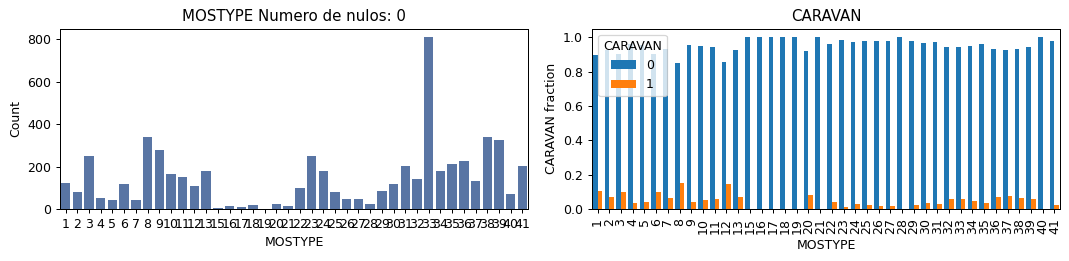

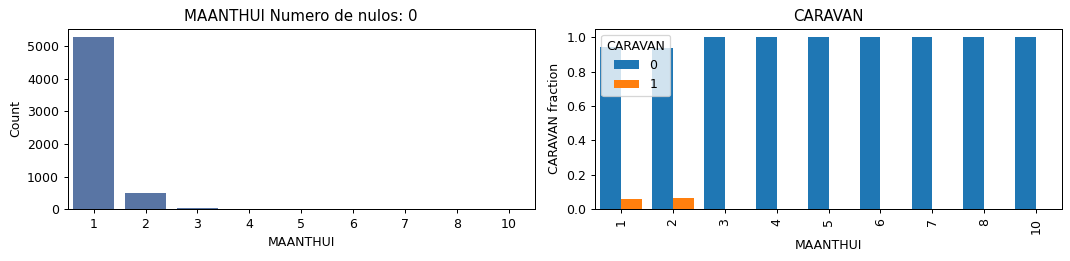

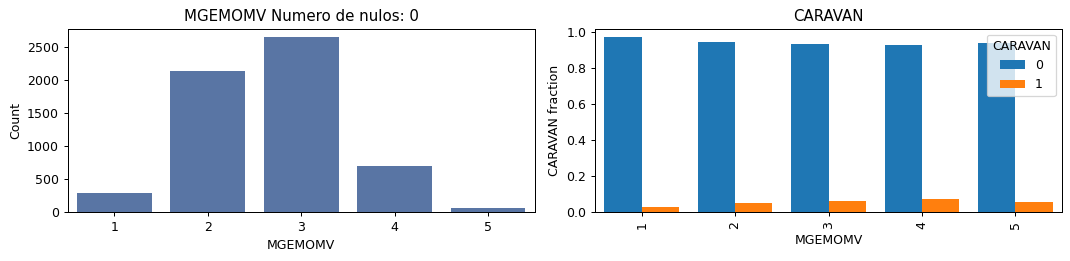

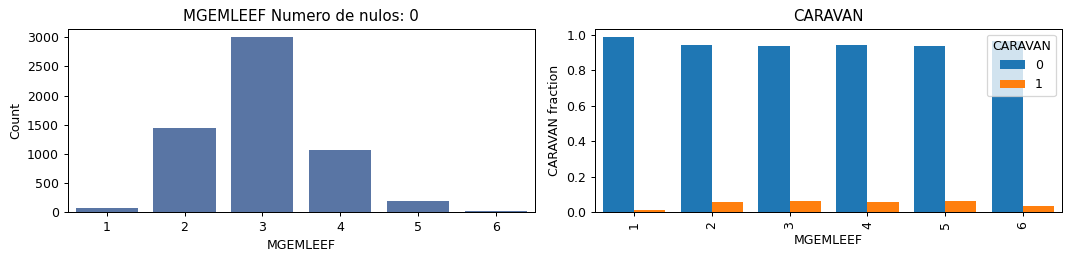

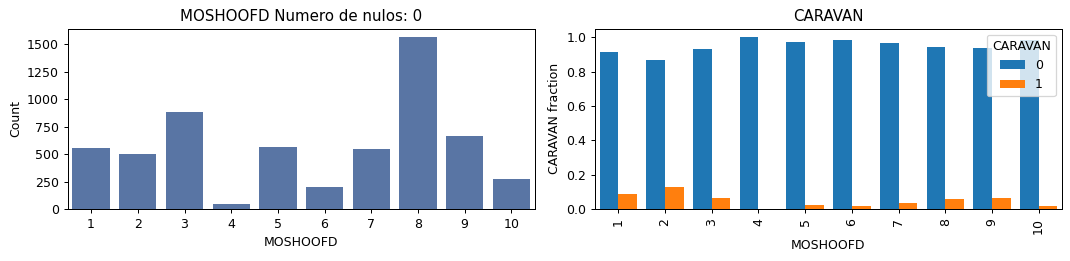

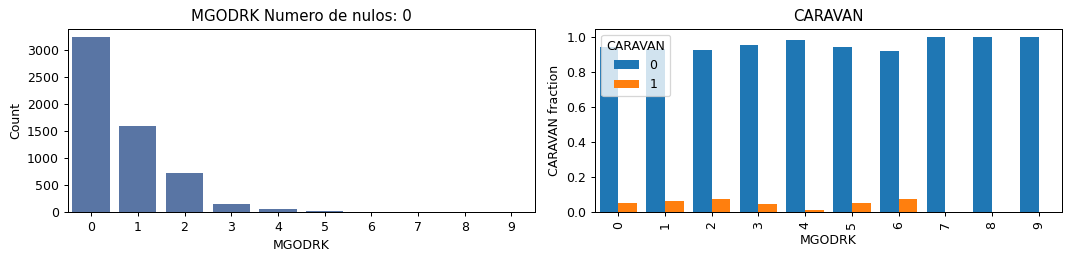

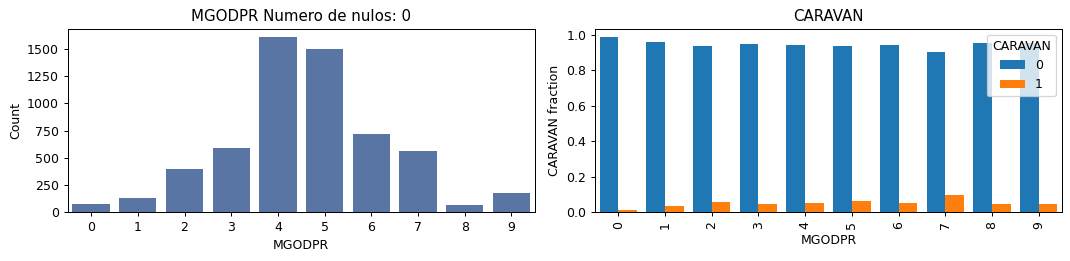

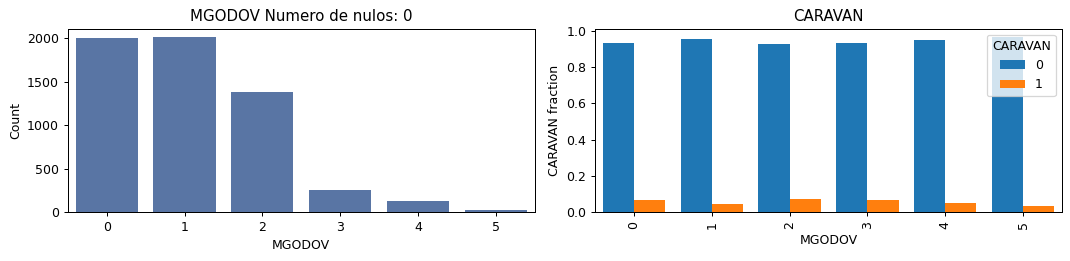

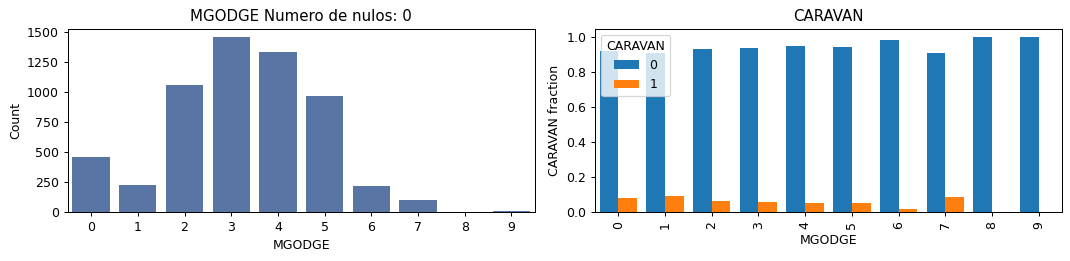

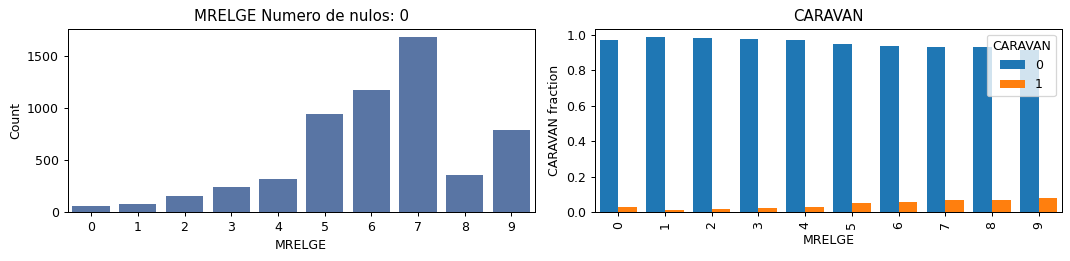

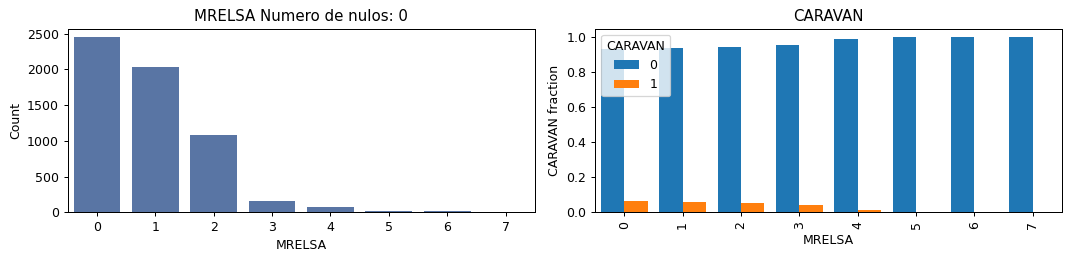

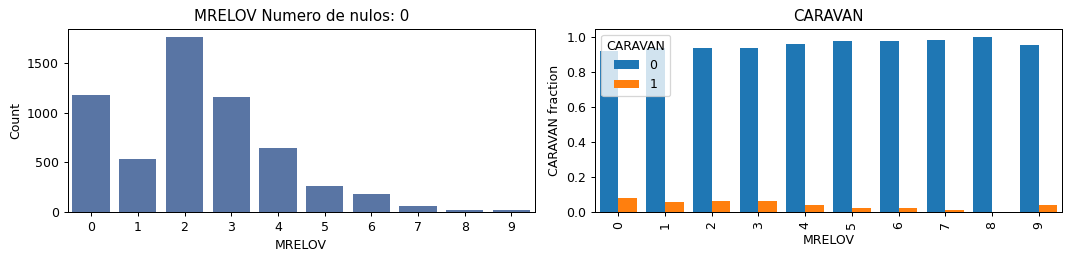

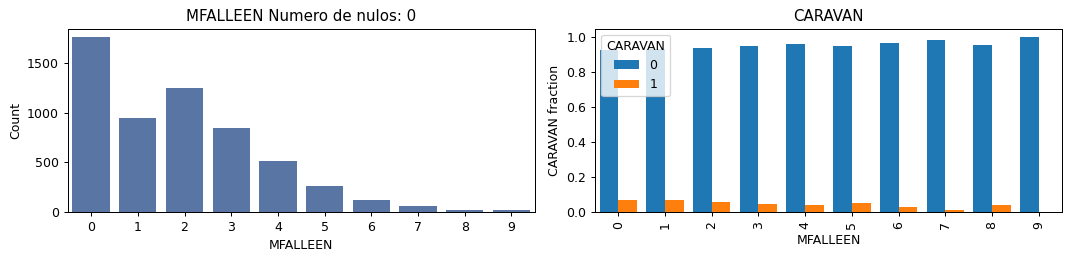

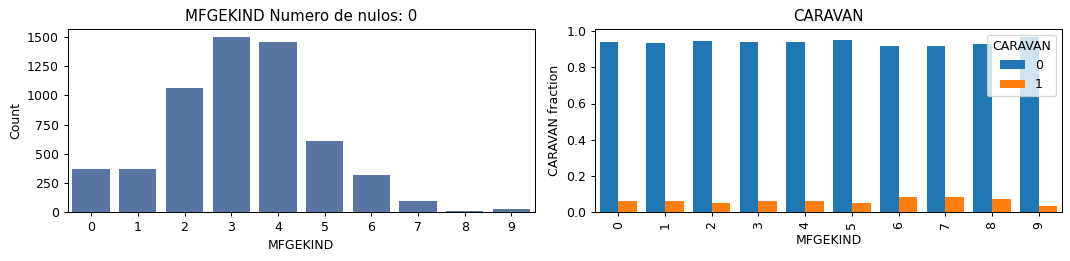

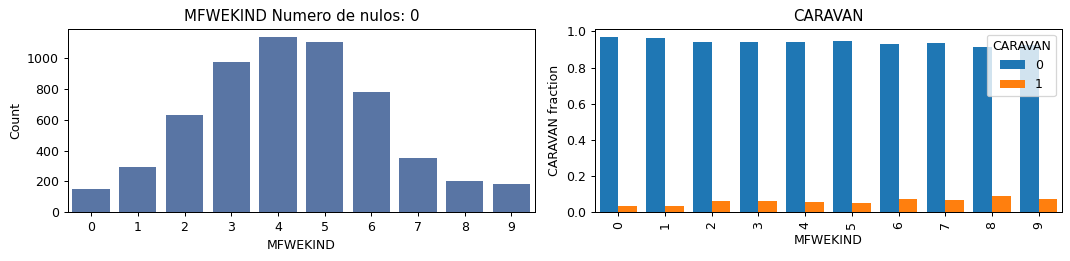

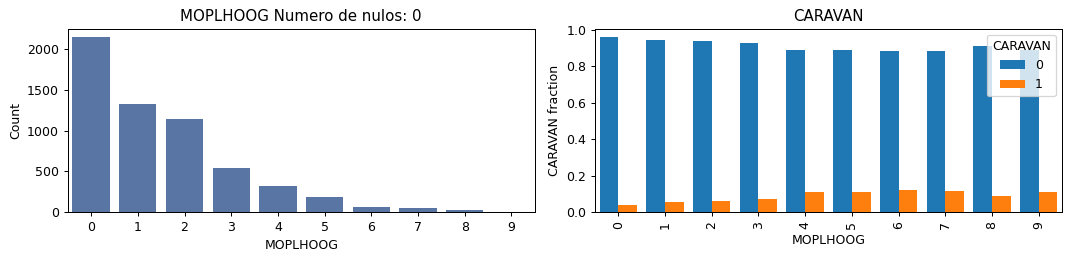

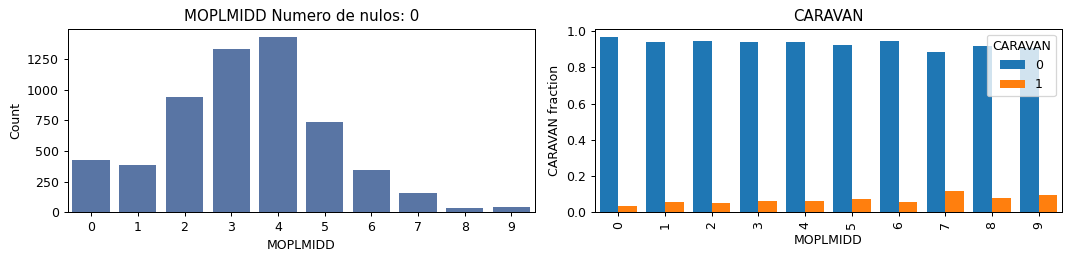

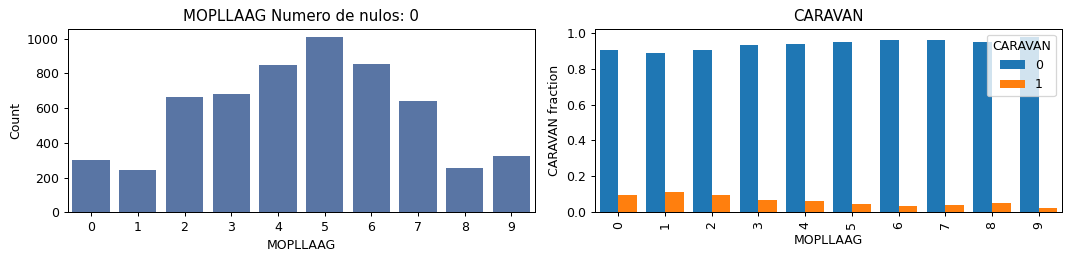

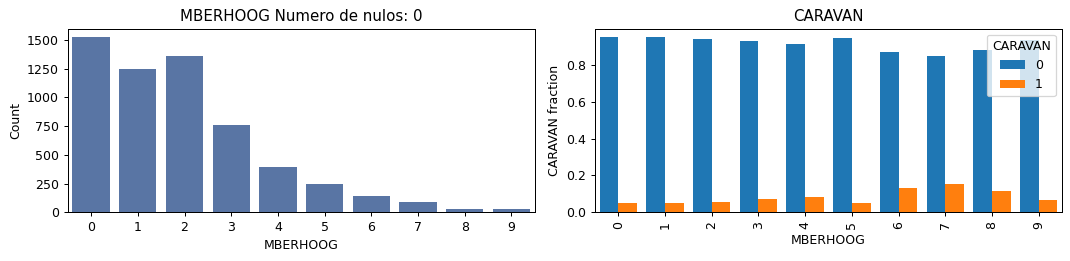

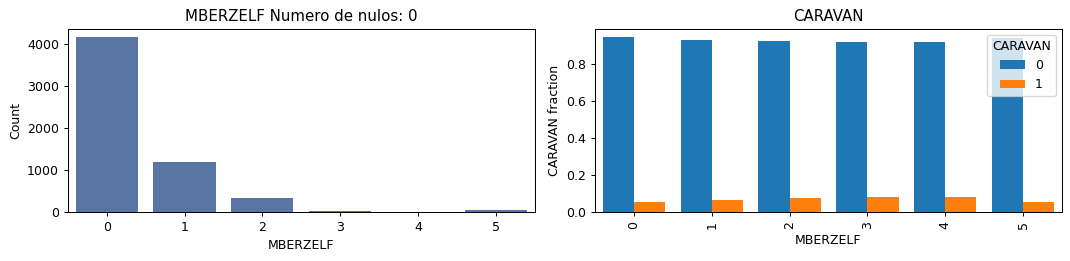

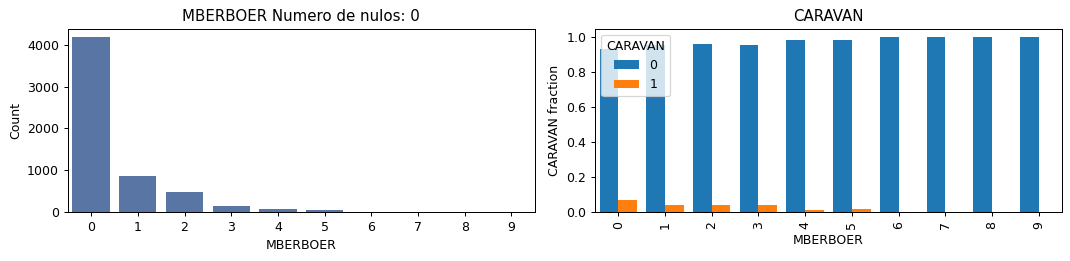

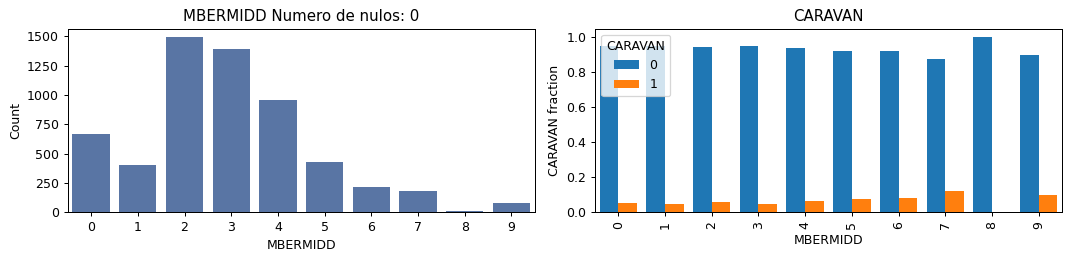

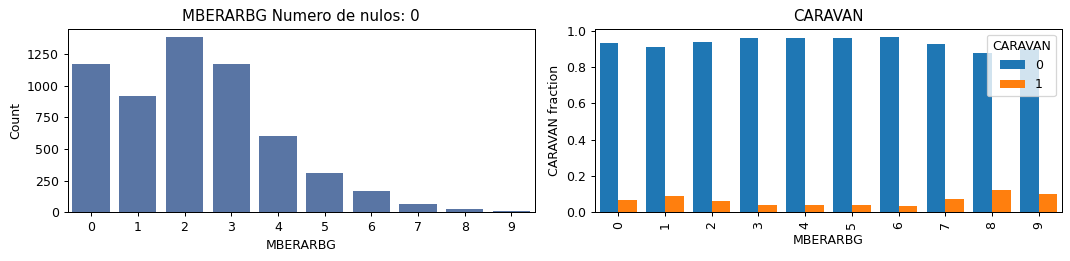

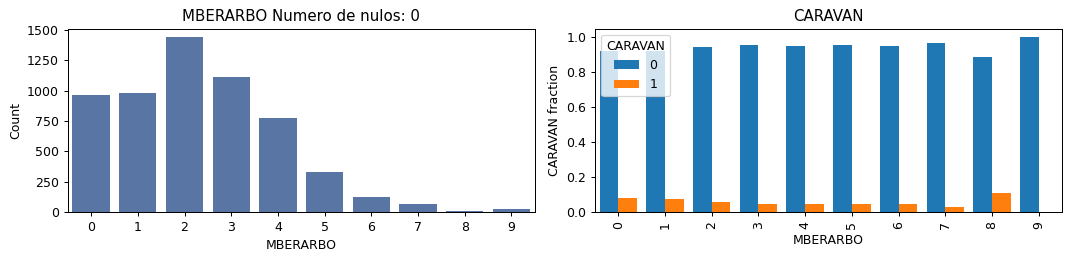

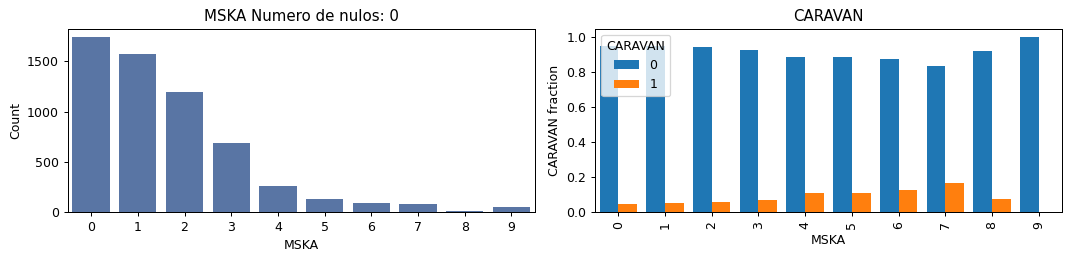

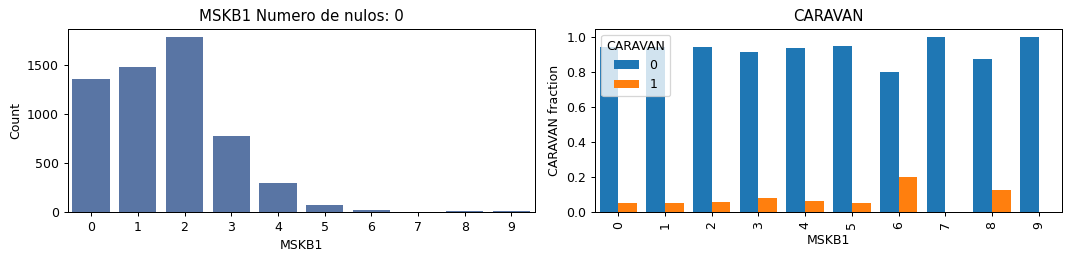

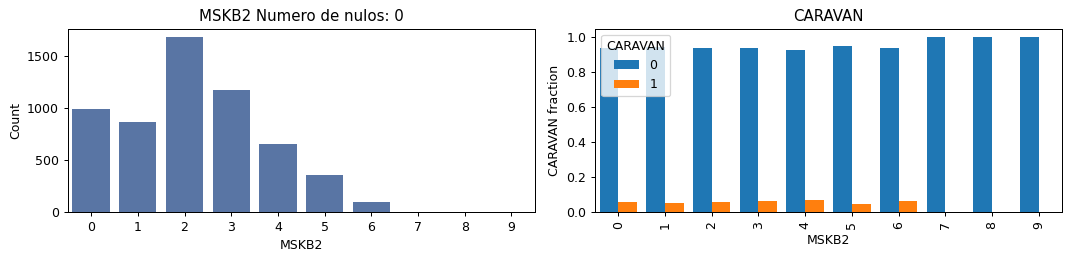

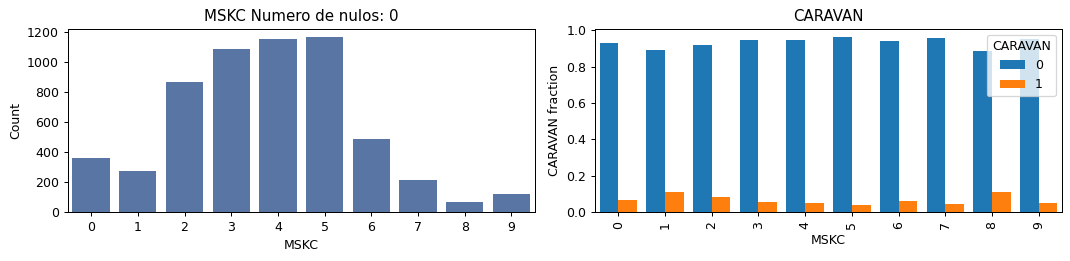

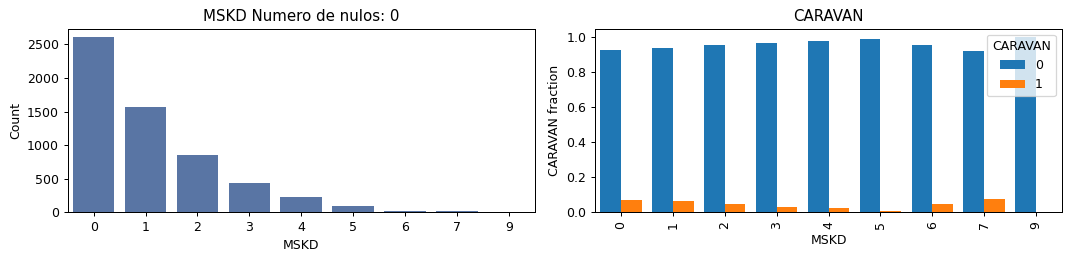

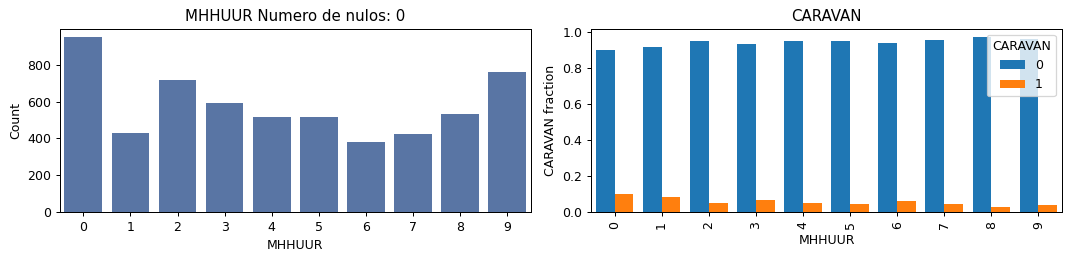

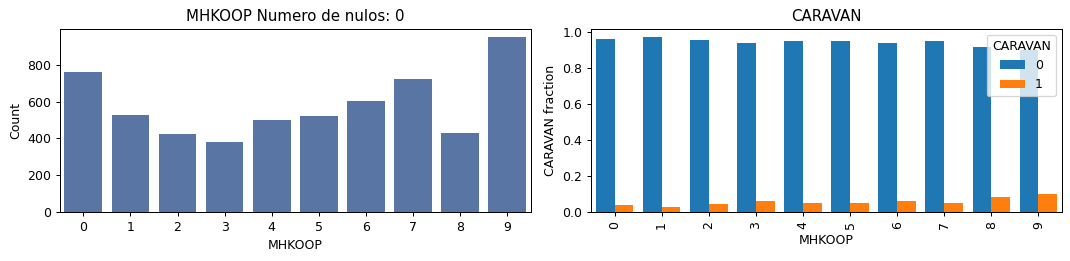

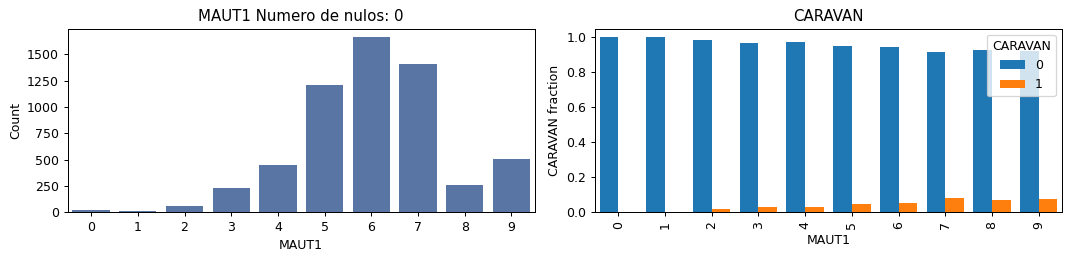

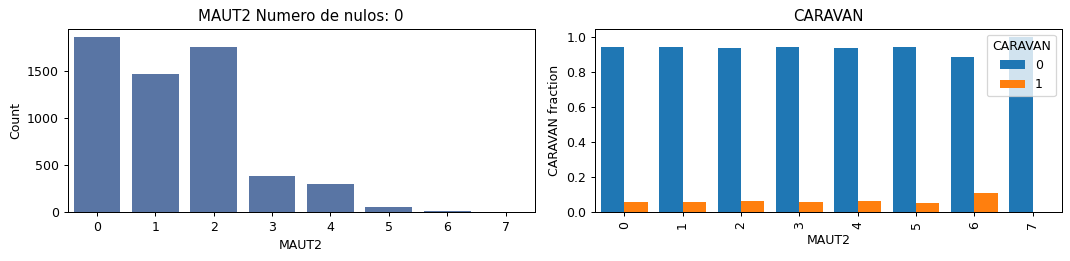

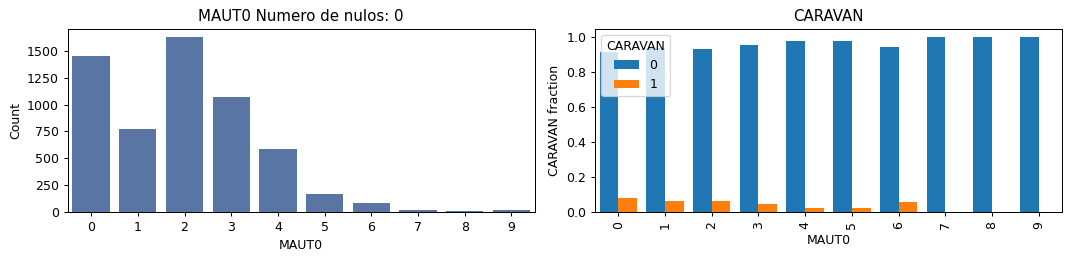

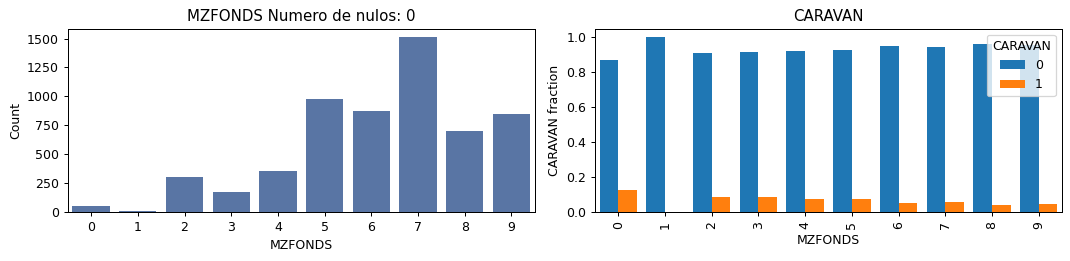

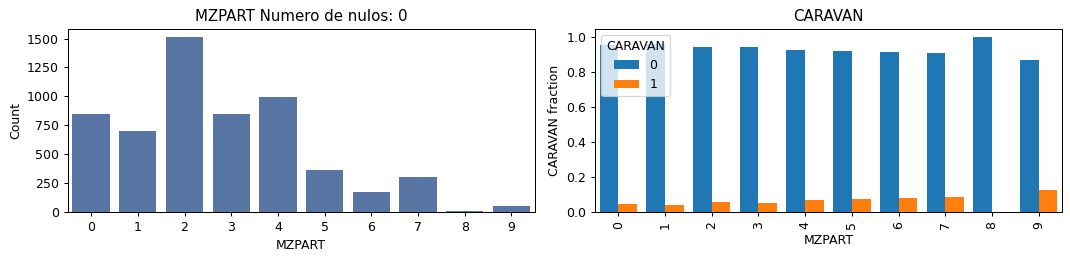

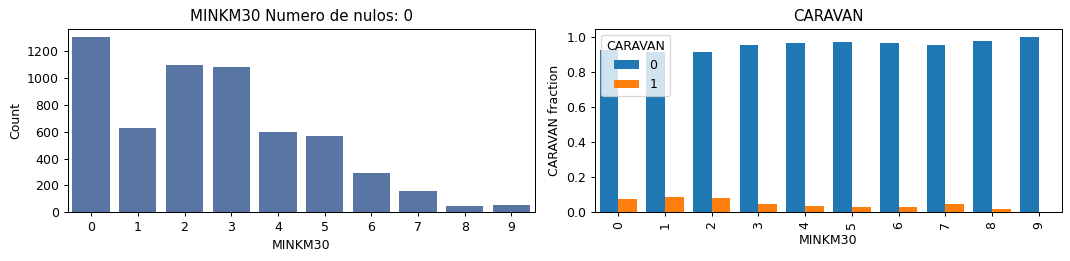

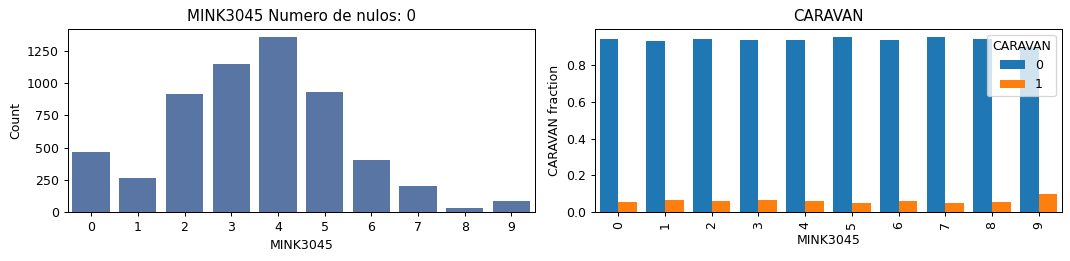

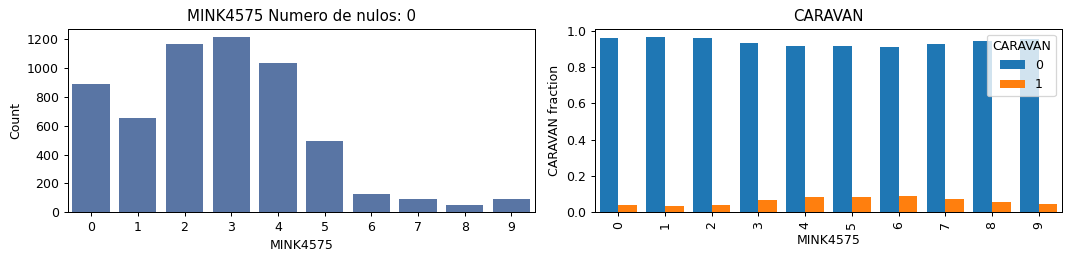

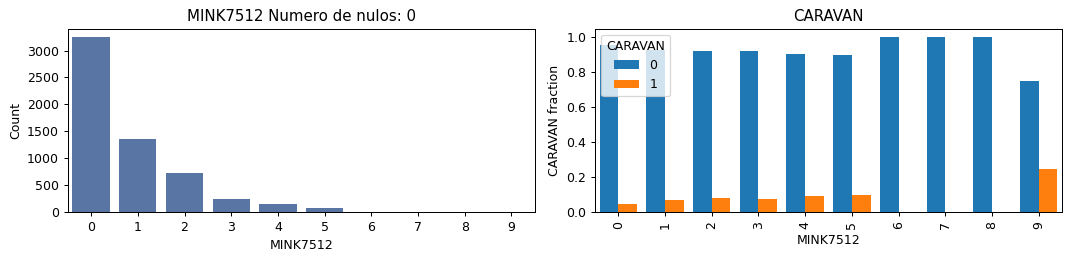

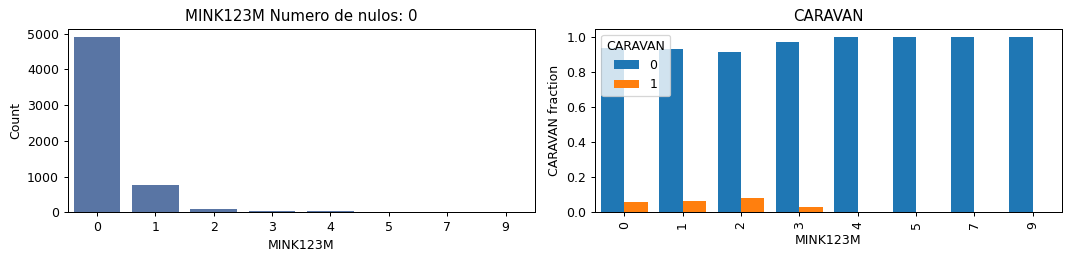

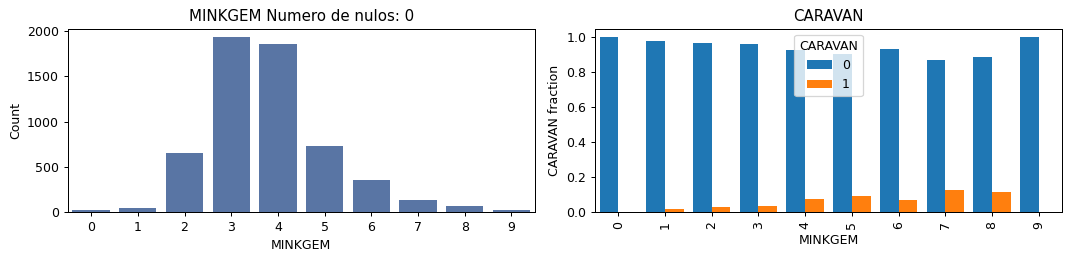

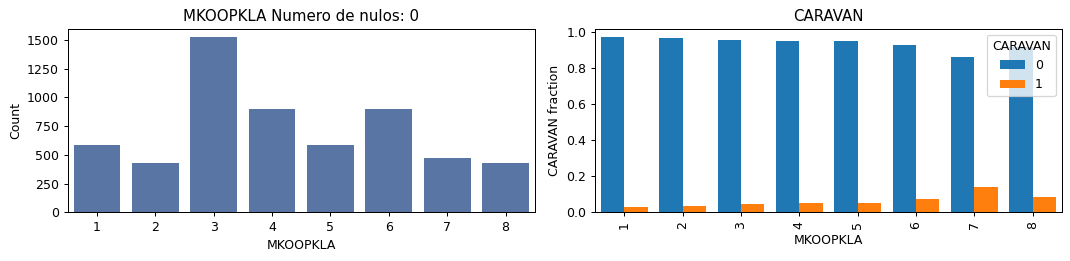

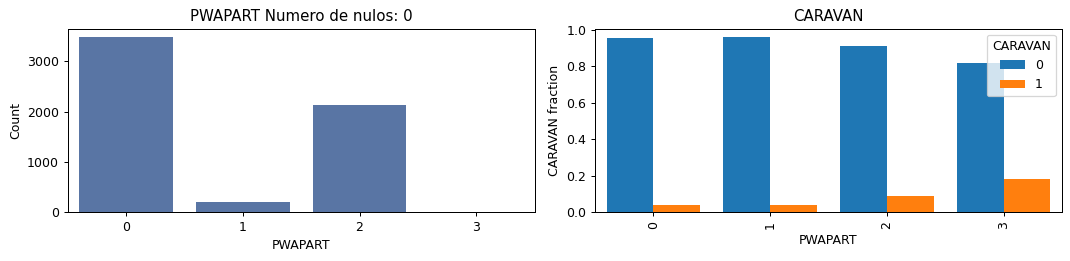

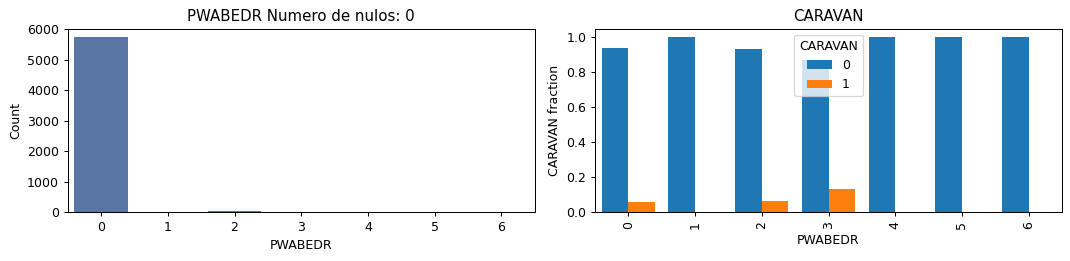

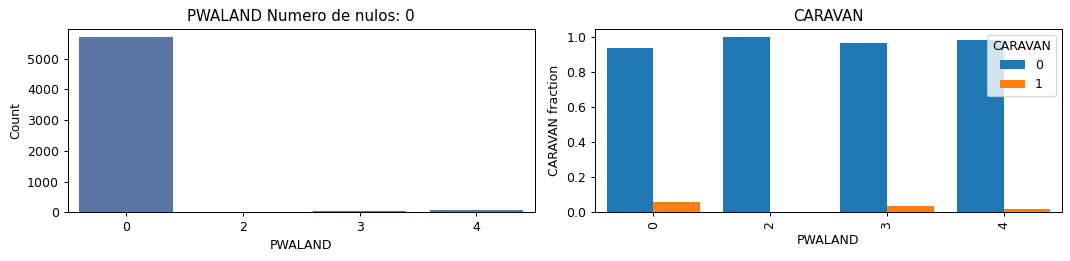

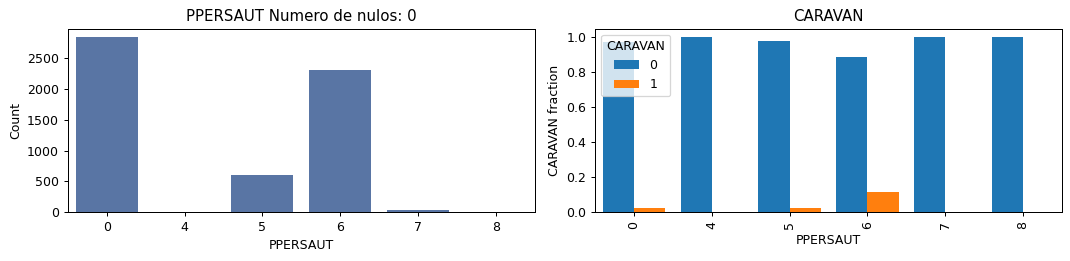

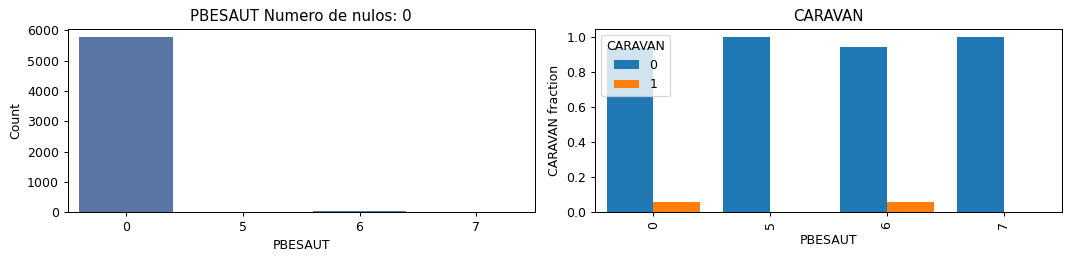

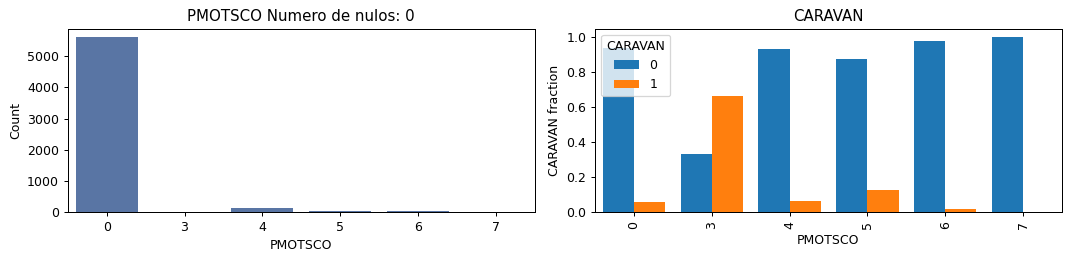

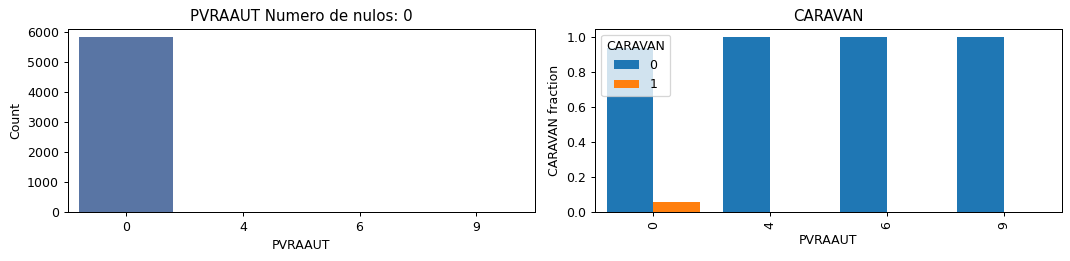

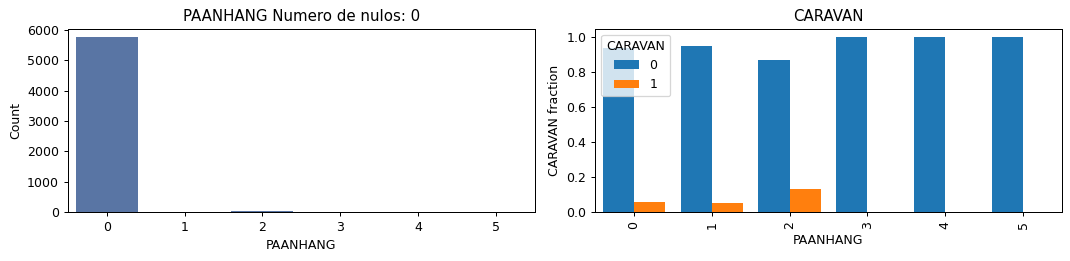

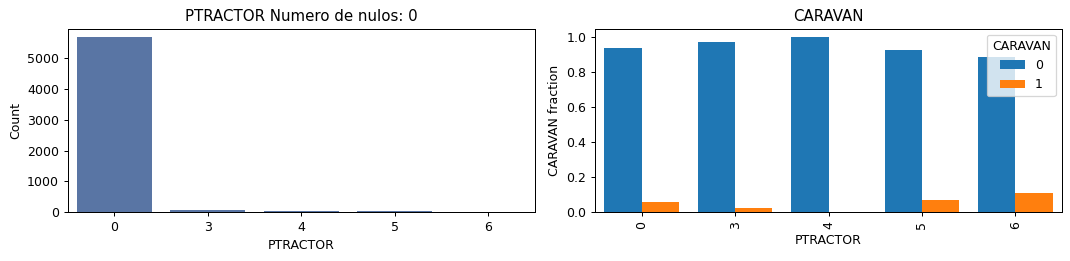

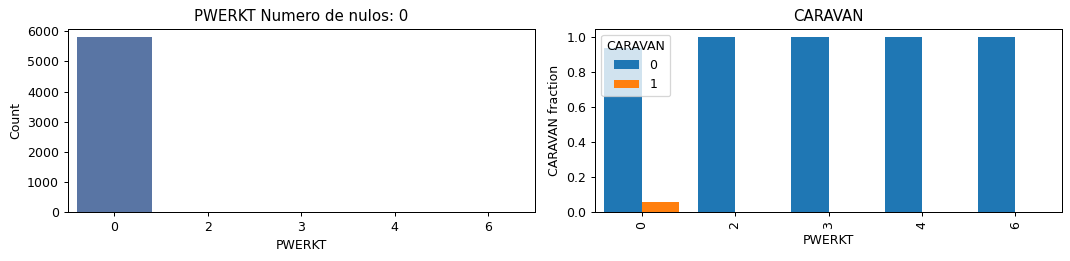

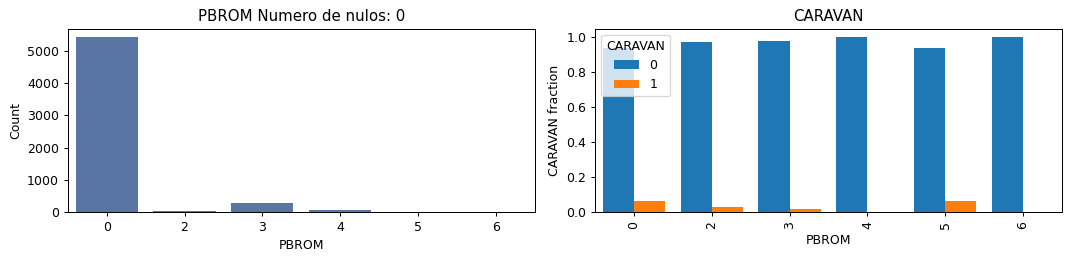

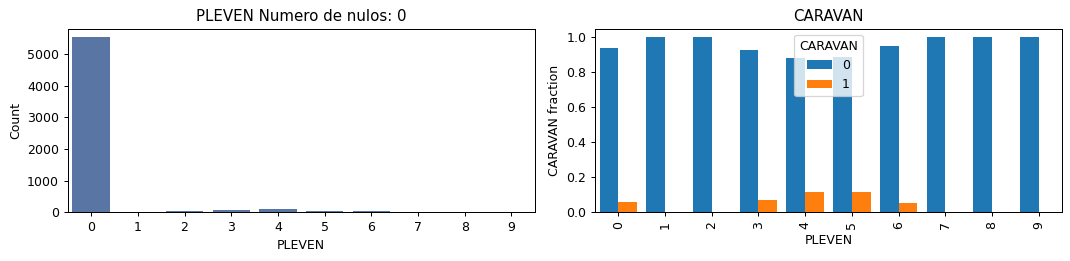

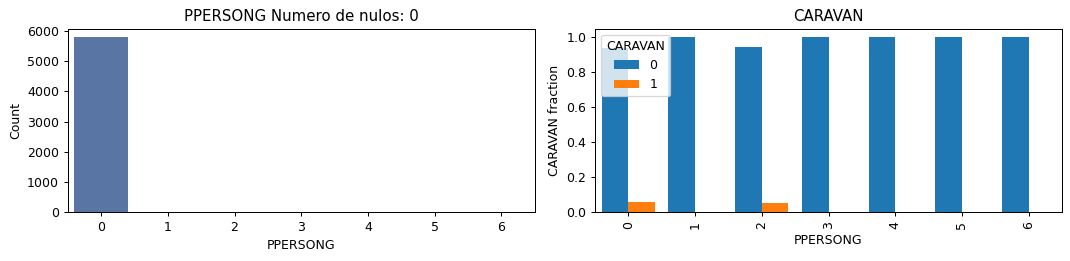

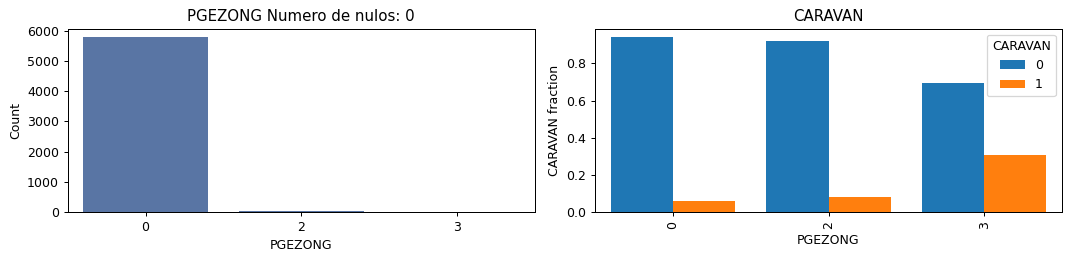

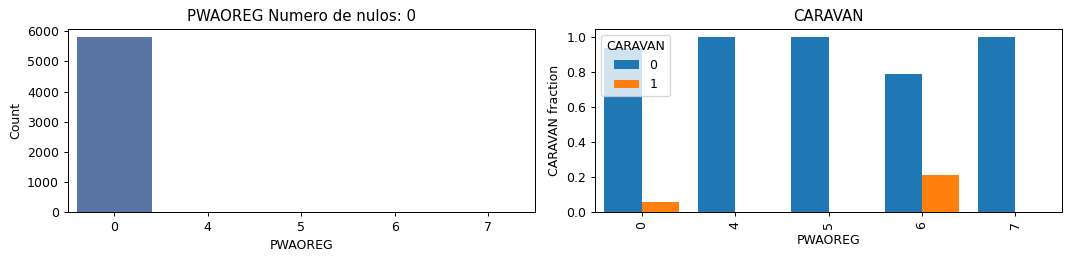

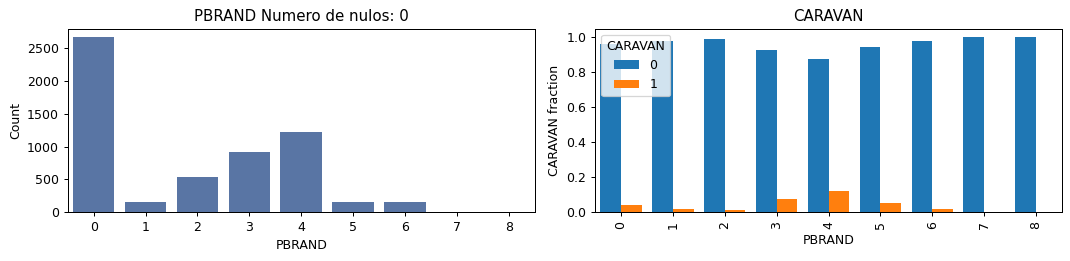

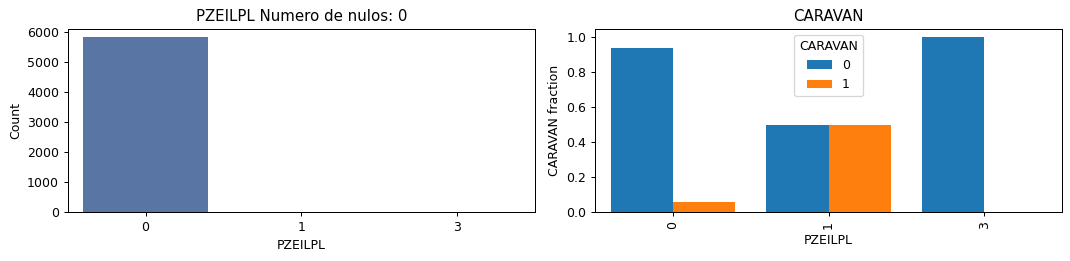

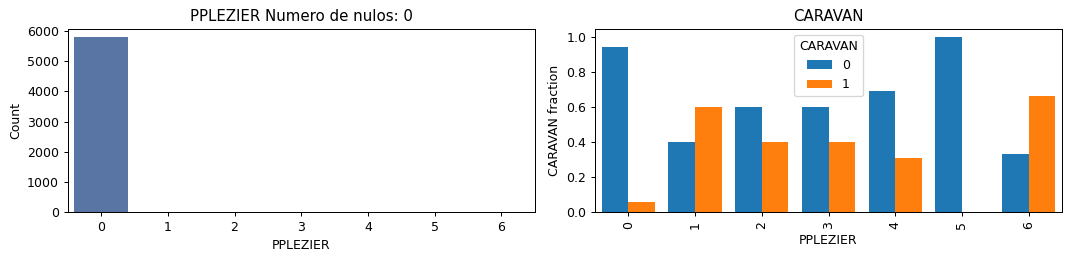

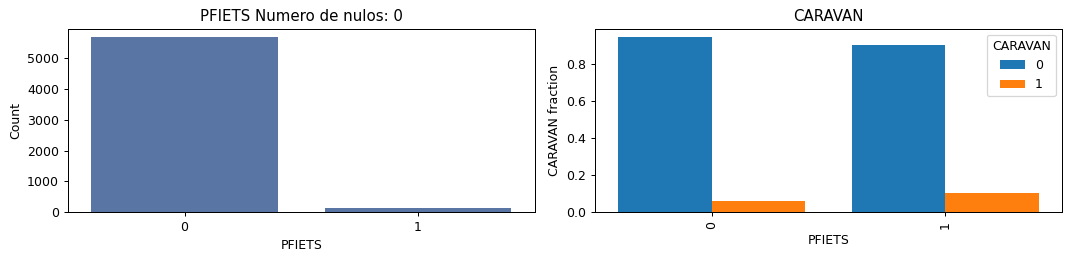

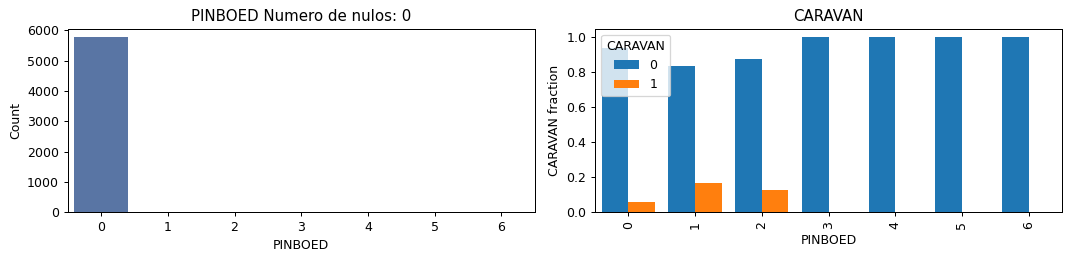

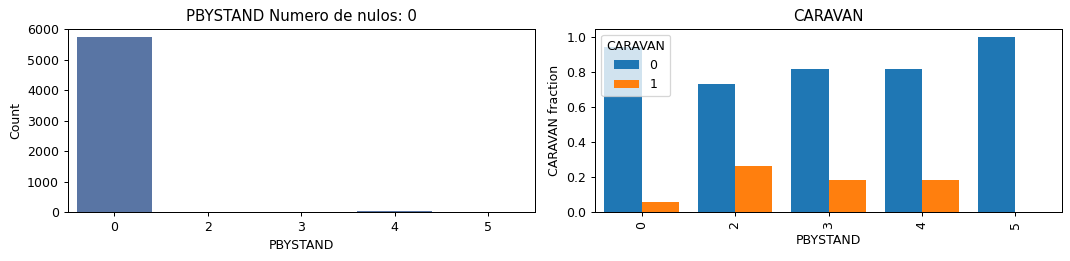

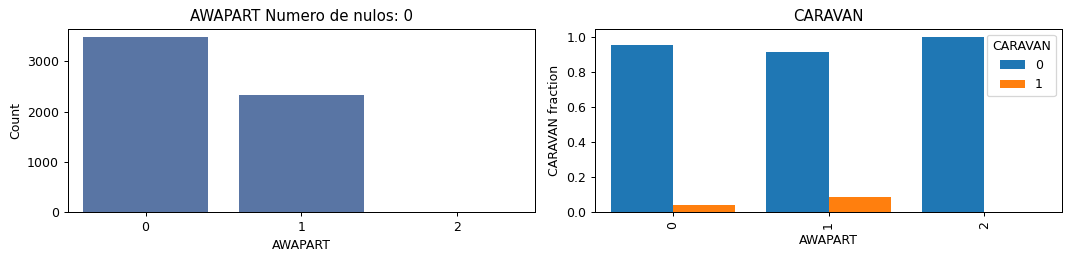

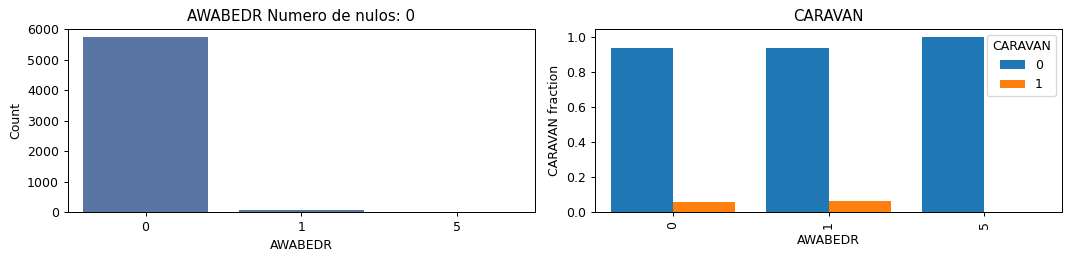

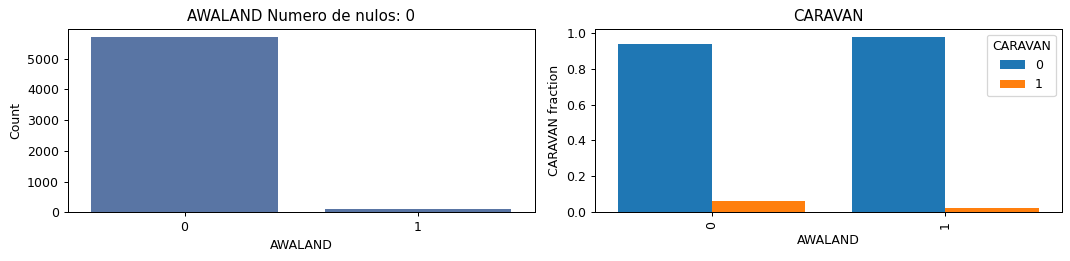

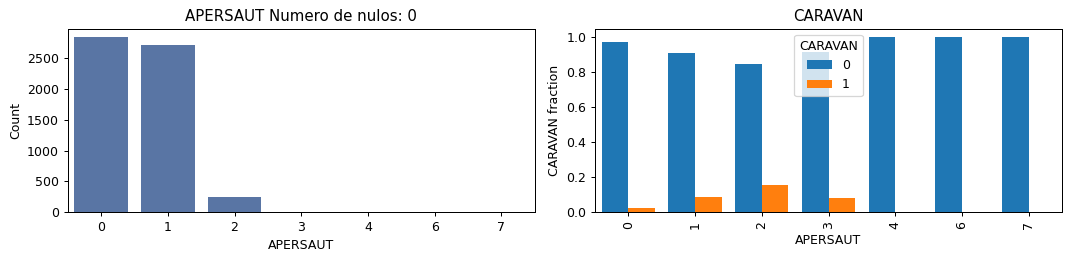

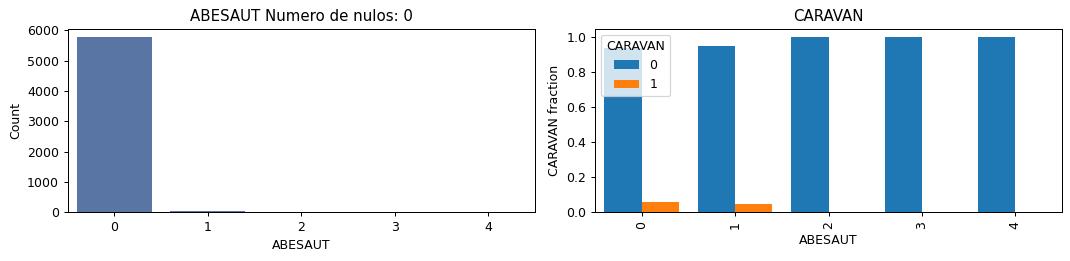

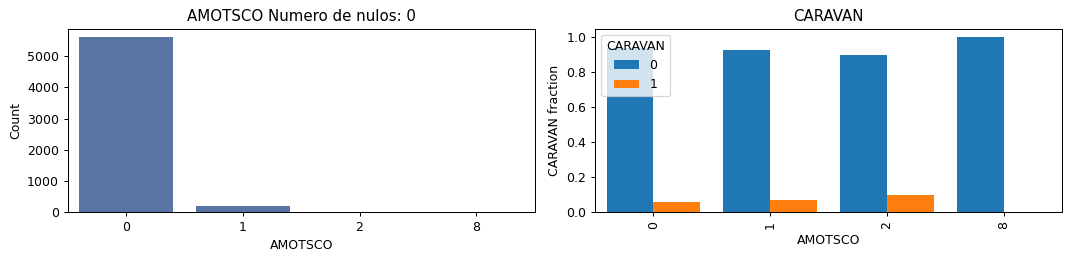

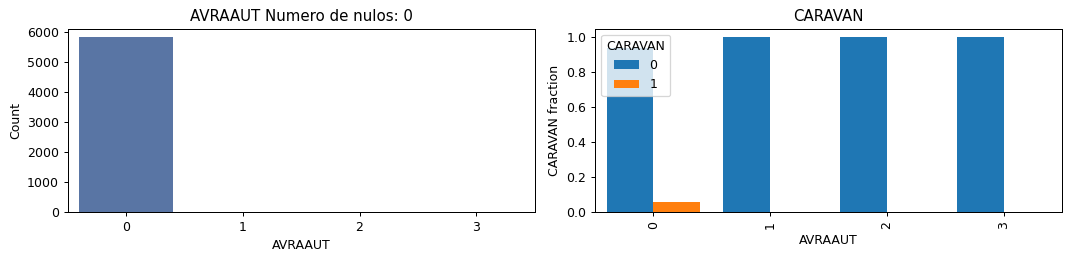

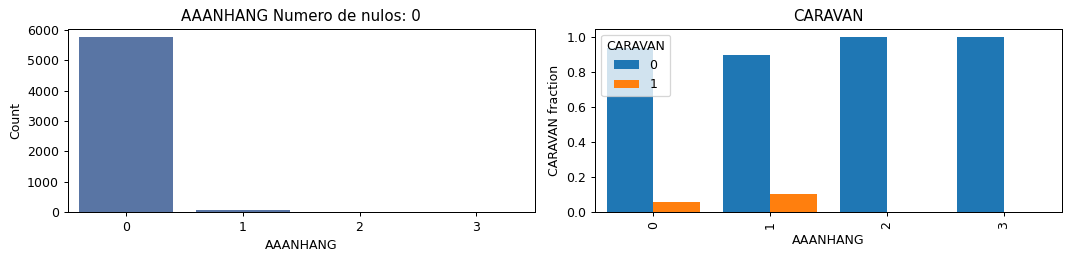

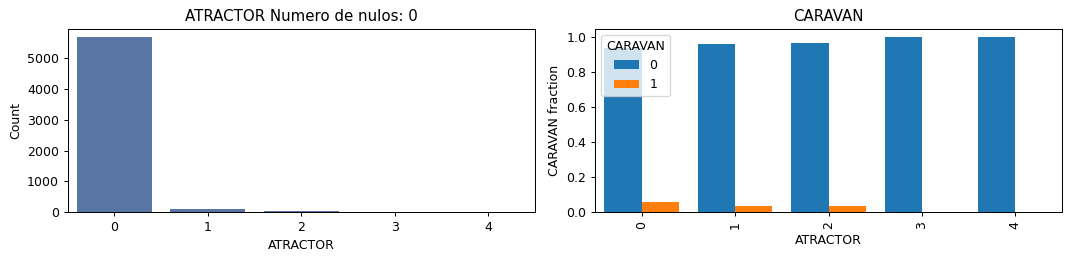

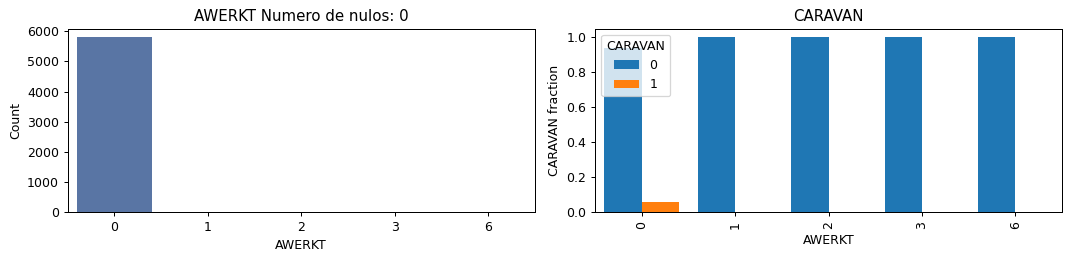

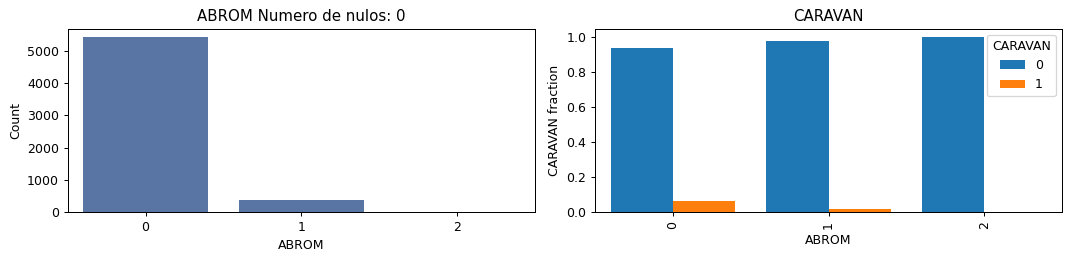

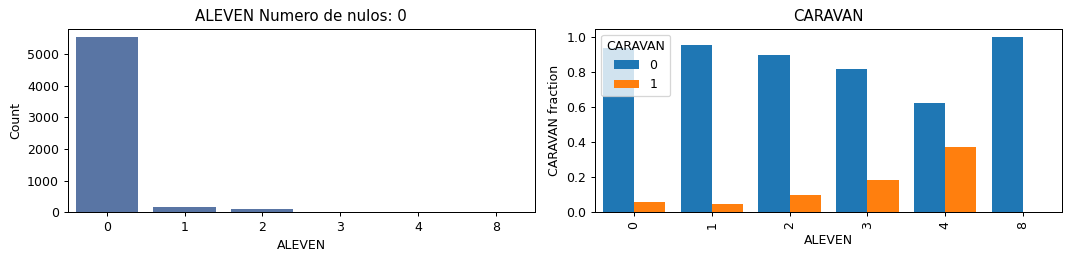

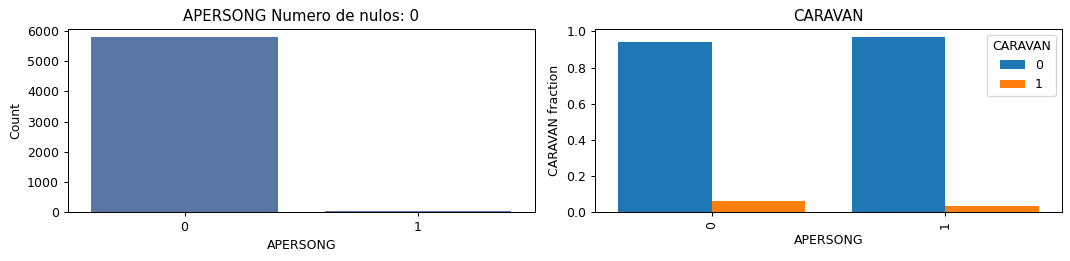

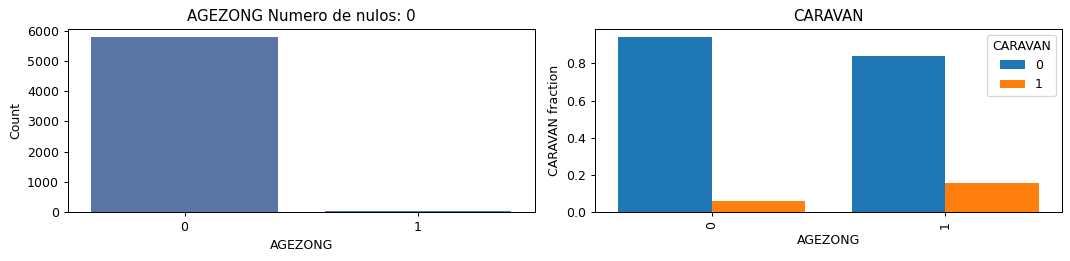

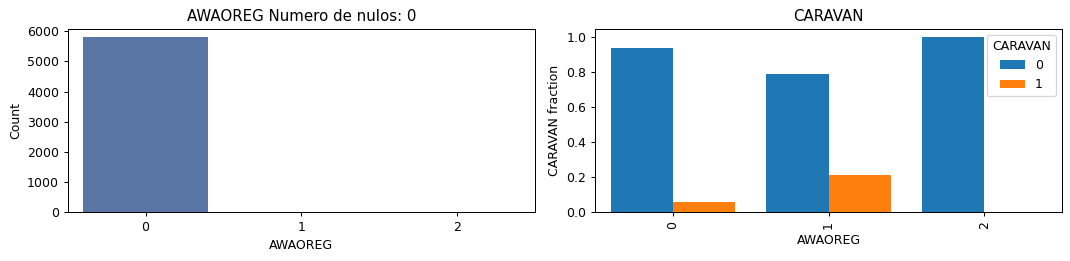

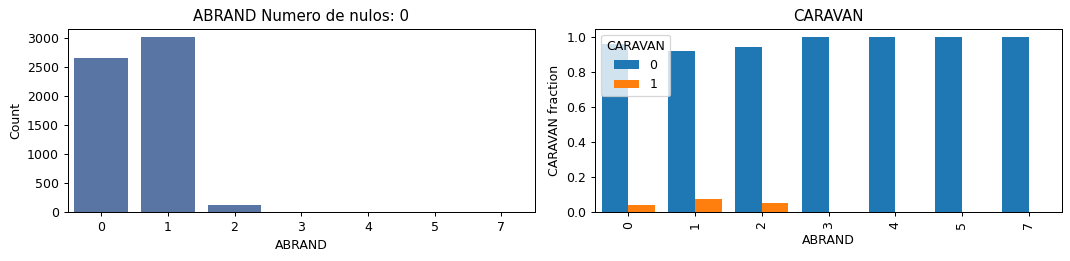

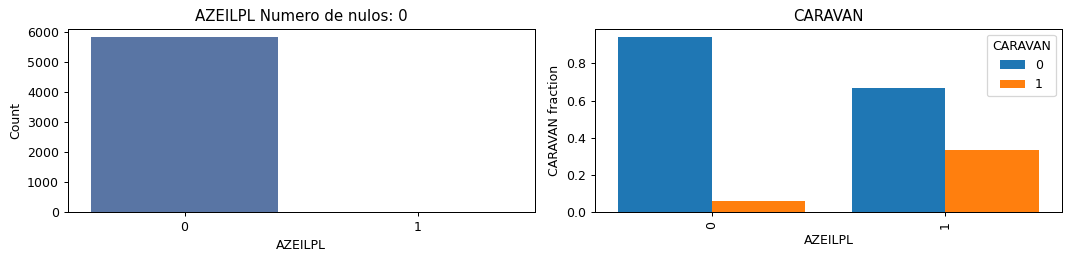

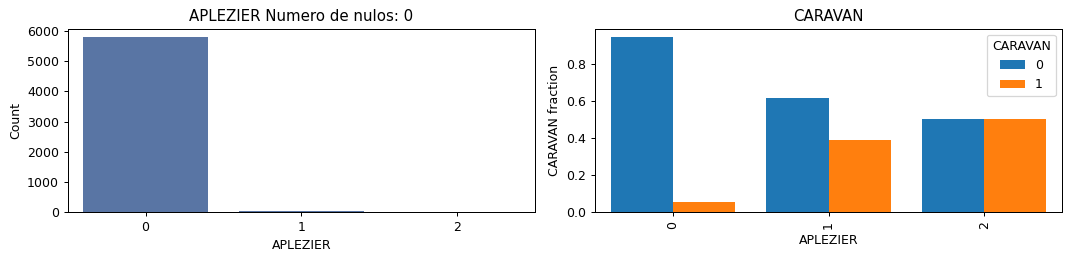

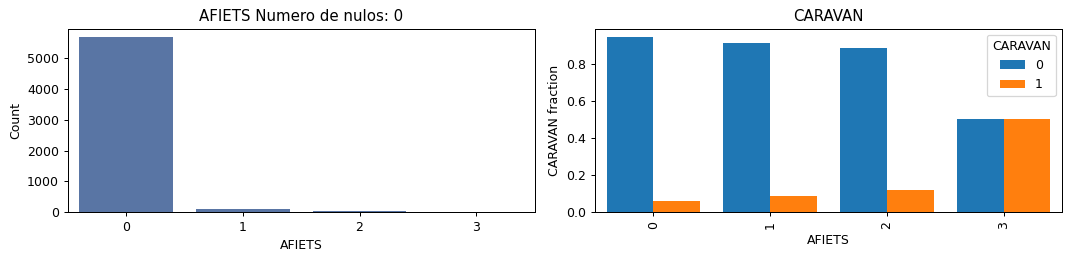

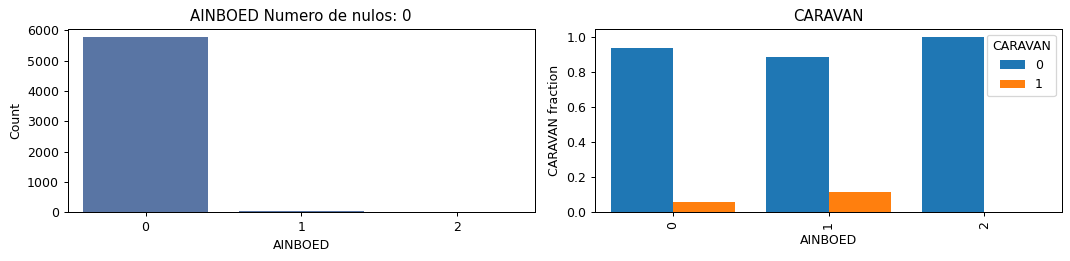

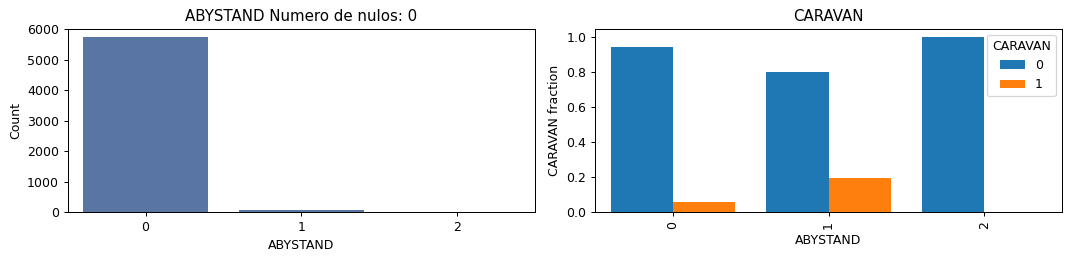

In [114]:
warnings.filterwarnings('ignore')

for i in list(pd_data.columns):
    if (pd_data[i].dtype==float) & (i!='CARAVAN'):
         plot_feature(pd_data, col_name=i, isContinuous=True, target='CARAVAN')
    elif  i!='CARAVAN':
        plot_feature(pd_data, col_name=i, isContinuous=False, target='CARAVAN')

## Identificacion de correlacion entre los datos

In [ ]:
pd_data.corr()

## Identificar la correlacion que existen entre la variables

In [ ]:
plt.figure(figsize=(30,30))
heatmap = sns.heatmap(pd_data.corr(),vmin=-1,vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);